<a name="top"> <h1>02- Spatial Analisis Part 1</h1> <a>

<p>Geospatial Analysis of the 2023 Earthquakes in Turkey<br />
<strong>Master Thesis</strong><br />
<strong>Master of Data Science</strong></p>


<p style="text-align:right">Gozde Yazganoglu (<em>gozde.yazganoglu@cunef.edu</em>)</p>

### 1. Point Patern Analisis and Hexibin

Analyzing Building Behavior in Earthquakes Based on Spatial Patterns

Buildings' response to earthquakes can be interpreted from two primary spatial perspectives.

Firstly, buildings can be seen as static structures within a specific geographical context, meaning their position is predetermined or exogenous. Under this view, a building's location is somewhat secondary compared to the structural or architectural characteristics that determine its resistance to seismic forces. For instance, when evaluating how many buildings in a particular neighborhood survived an earthquake, the neighborhood's geographic location might be constant, and the primary emphasis is on the structural design of the buildings in that area. This approach aligns with how we might assess other spatial entities, such as roads or bridges, within the same earthquake zone.

Secondly, each building's site might be understood as a reflection of the broader, geographically distributed seismic activity. Here, while the impact of earthquakes could be felt anywhere, certain sites are more prone to stronger seismic activities due to underlying geological processes. For example, buildings constructed near fault lines might offer insights into the local seismic behavior, tectonic movements, or even soil liquefaction patterns. Simultaneously, the resilience or damage level of these structures might hint at broader architectural trends and construction standards specific to that region. In this viewpoint, the building's location and its earthquake-related behavior are equally crucial. This dual emphasis will be the cornerstone of our subsequent discussions on the matter.

When assessing building damage level due to an earthquake, using your provided questions, we can frame the inquiries as follows:

1-What does the pattern look like?
        How do the patterns of damage across buildings manifest? Are there specific parts of the building that are more affected, or is the damage spread evenly?

2-What is the nature of the distribution of points?
        How is the damage distributed across the affected area? Are there concentrations of buildings with severe damage, or is the damage level scattered unevenly across buildings?

3- Is there any structure in the way locations are arranged over space? That is, are events clustered? or are they dispersed?
        Do we notice any clusters of buildings with similar damage levels? Is the damage more severe in certain neighborhoods or zones compared to others? Or, on the contrary, is the damage uniformly spread without any discernible pattern?

Why do events occur in those places and not in others?
        What factors in our dataset explain 

These questions help in creating a comprehensive assessment of the building damage after an earthquake. They can guide urban planners, architects, and civil engineers in understanding the spatial distribution and causes of damage, thereby aiding in better future urban planning and building design strategies. As well as businesses might be interested to find risks and the factors affecting them.

Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle   
import numpy as np
import contextily as ctx
import fiona
import seaborn as sns
from pointpats import distance_statistics, QStatistic, random, PointPattern, centrography


In [2]:
#reading the data 
# 
data = gpd.read_file('../data/processed/dataset2.geojson')

data.head()

#alternatively (in case of geojson is killing your kernel)

#data = pd.read_pickle('../data/processed/dataset2.pickle')

,obj_type,info,damage_gra,locality,population,income,total_sales,second_sales,water_access,elec_cons,...,fertility,hh_size,longitude,latitude,nearest_water_source_distance,nearest_camping_distance,nearest_earthquake_distance,nearest_fault_distance,elev,geometry
0,11-Residential Buildings,997-Not Applicable,1,ADIYAMAN,316140,4092,40087,20574,0.98,2060,...,2.36,4.0,38.314252,37.768867,0.077874,0.020232,0.097845,0.016935,660.0,POINT (38.31425 37.76887)
1,11-Residential Buildings,997-Not Applicable,1,ADIYAMAN,316140,4092,40087,20574,0.98,2060,...,2.36,4.0,38.313284,37.768690,0.076904,0.019284,0.097004,0.017440,660.0,POINT (38.31328 37.76869)
2,12-Non-residential Buildings,1251-Industrial buildings,1,ADIYAMAN,316140,4092,40087,20574,0.98,2060,...,2.36,4.0,38.318013,37.768612,0.081336,0.023588,0.100527,0.014585,660.0,POINT (38.31801 37.76861)
3,12-Non-residential Buildings,1251-Industrial buildings,1,ADIYAMAN,316140,4092,40087,20574,0.98,2060,...,2.36,4.0,38.318677,37.768575,0.081953,0.024196,0.101013,0.014241,660.0,POINT (38.31868 37.76857)
4,11-Residential Buildings,997-Not Applicable,1,ADIYAMAN,316140,4092,40087,20574,0.98,2060,...,2.36,4.0,38.312542,37.768514,0.076146,0.018542,0.096334,0.017826,660.0,POINT (38.31254 37.76851)


Below plot demonstrates the distribution of the buildings data on affected area. This data includes every single observation. It is expected that since we have 19 different locations, buildings are separated in the area. However, we are able to observe that  they tend to distribute in certain places in general.

In [3]:
data.columns

Index(['obj_type', 'info', 'damage_gra', 'locality', 'population', 'income',
       'total_sales', 'second_sales', 'water_access', 'elec_cons',
       'building_perm', 'land_permited', 'labour_fource', 'unemployment',
       'agricultural', 'life_time', 'hb_per100000', 'fertility', 'hh_size',
       'longitude', 'latitude', 'nearest_water_source_distance',
       'nearest_camping_distance', 'nearest_earthquake_distance',
       'nearest_fault_distance', 'elev', 'geometry'],
      dtype='object')

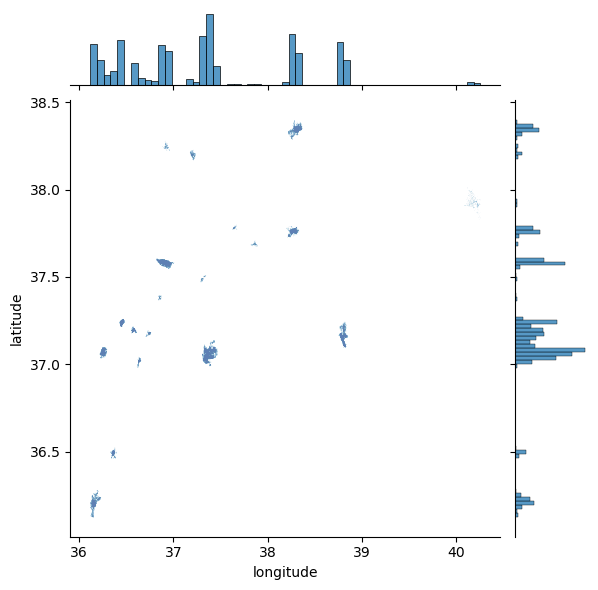

In [4]:
# Generate scatter plot
sns.jointplot(x="longitude", y="latitude", data=data, s=0.01);

    Hexbin : 

Our problem is trying to find a density of the spatial distribution. One way to solve this is using hexbin function by python, dividing are a to hexagons. 
Hexbins are similar to grids and grids are as similar to bar charts where each bar counts things in a particular space. Just like we choose how many bars or categories we want in a bar chart, we decide the number of "buckets" or areas in a grid. This way of counting is quick and can be very detailed. But there's a downside: it can simplify and change how we view things that naturally spread out without clear boundaries.

In our example, in order to demonstrate better grid size is chosen as 150 so that different city centers also can appear on the map.

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


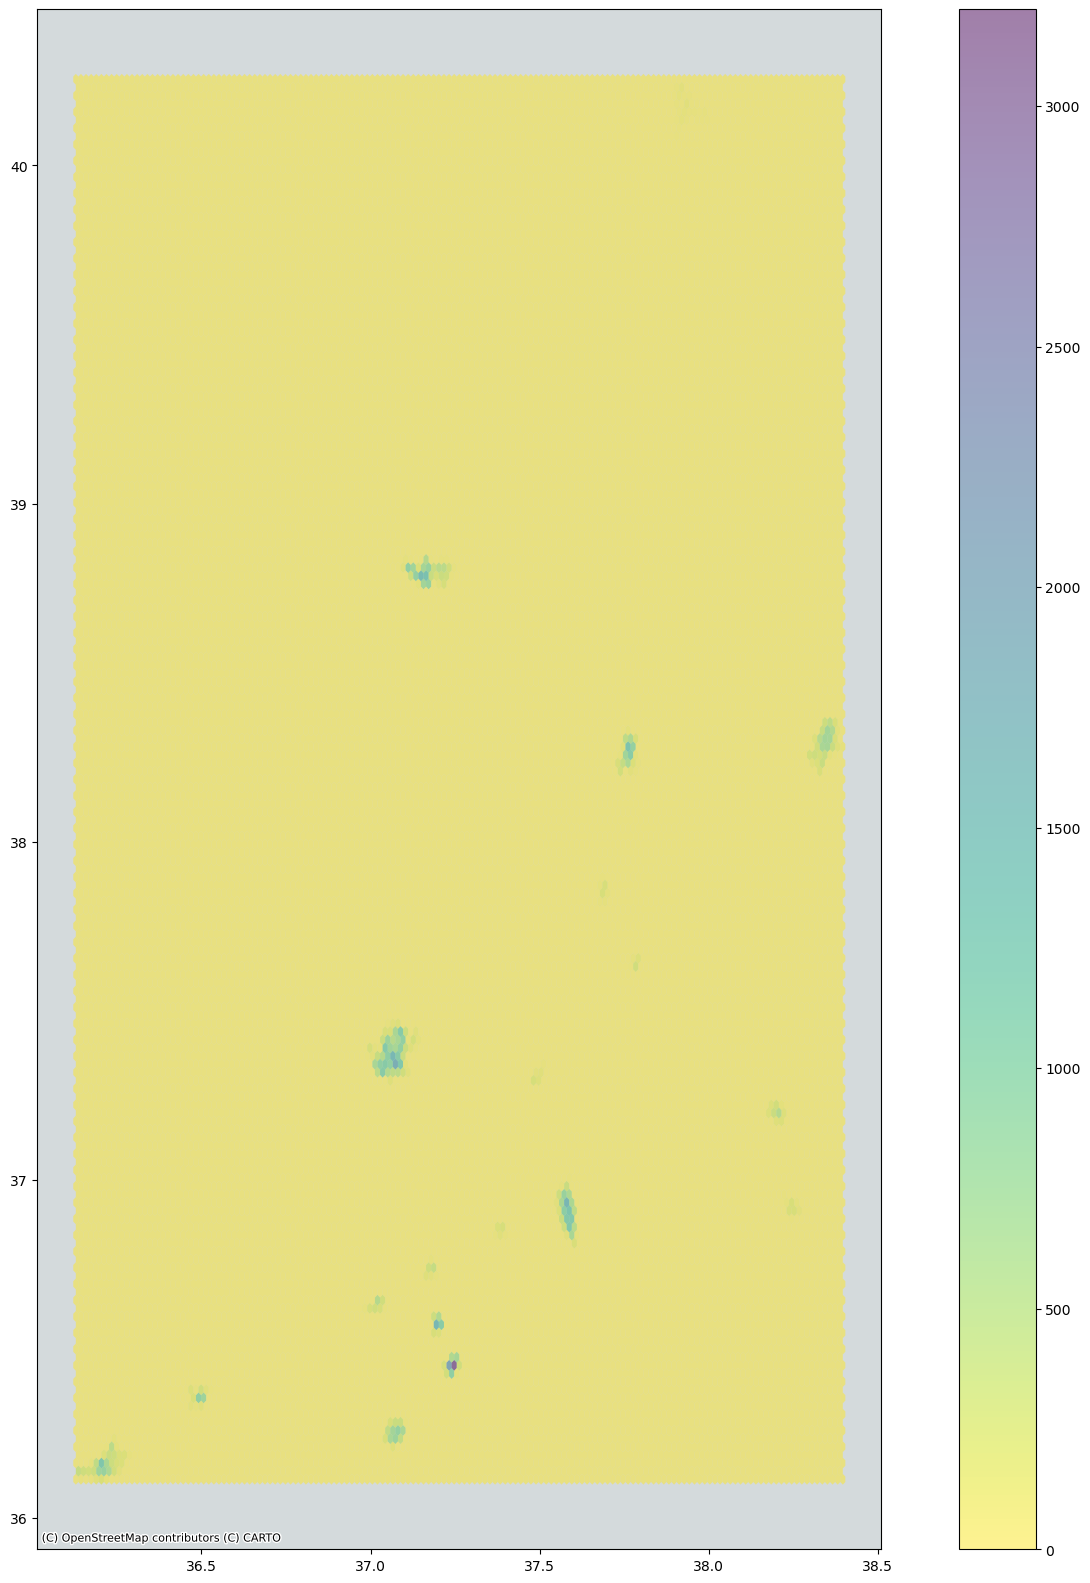

In [5]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Generate and add hexbin with 150 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    data["latitude"],
    data["longitude"],
    gridsize=150,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)


    KDE(Kernel Density Estimation):

Another way to show density is using kernel density histogram. It's like a smooth, even blanket laid over a space. Instead of just counting things in square or hexagon areas, KDE uses special functions, like mini magnets, that pull points towards them. The closer a point is to the magnet, the stronger the pull. All these pulls together make a smooth, continuous surface that shows the likelihood of finding something in any spot. The most popular type of this "magnet" or function is called Gaussian, which pulls points in a bell-curve shape. So, with KDE, we get a smooth map showing where things are likely found.

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


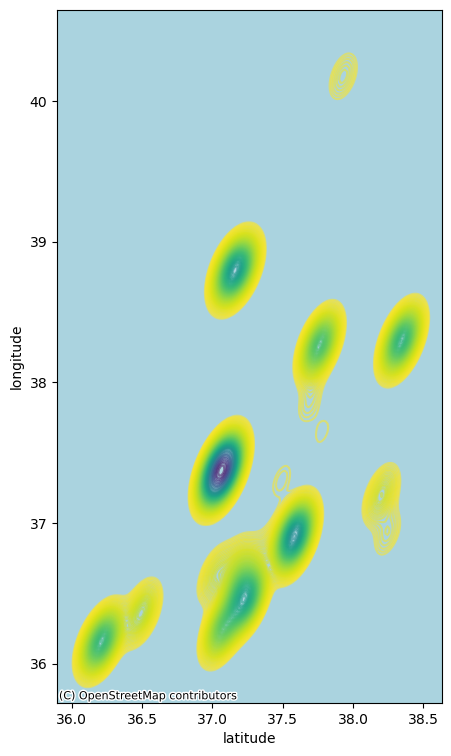

In [6]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12,9))
# Generate and add KDE with a shading of 150 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    x="latitude",
    y="longitude",
    data=data,
    n_levels=100,
    fill = False,
    alpha=0.55,
    cmap="viridis_r",
)
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.OpenStreetMap.Mapnik
)

Now we can check the where are the damaged buildings and try to locate where they show more density.

Text(0.5, 1.0, 'Damaged and Destroyed buildings')

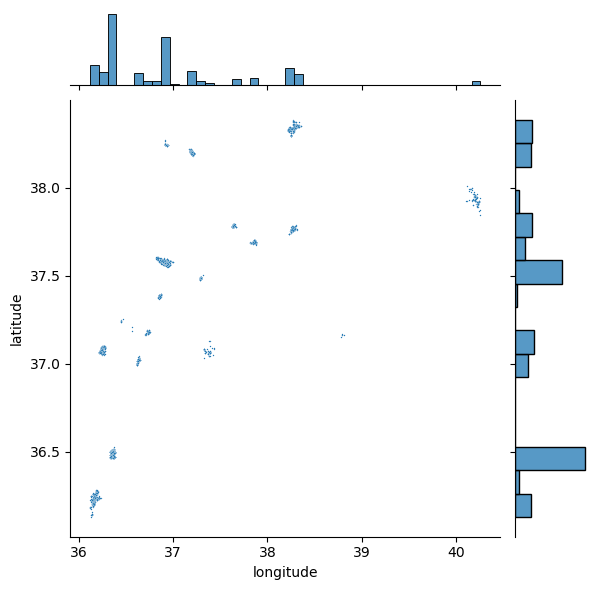

In [7]:
#filtering the buildings which were affected by the earthquake 

filtered_data = data[(data['damage_gra'] == 4) | (data['damage_gra'] == 3)| (data['damage_gra'] == 2)]


#Scatter Plot of the buildings which were affected by the earthquake
sns.jointplot(x="longitude", y="latitude", data=filtered_data, s=1);

# Set title
ax.set_title('Damaged and Destroyed buildings')

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


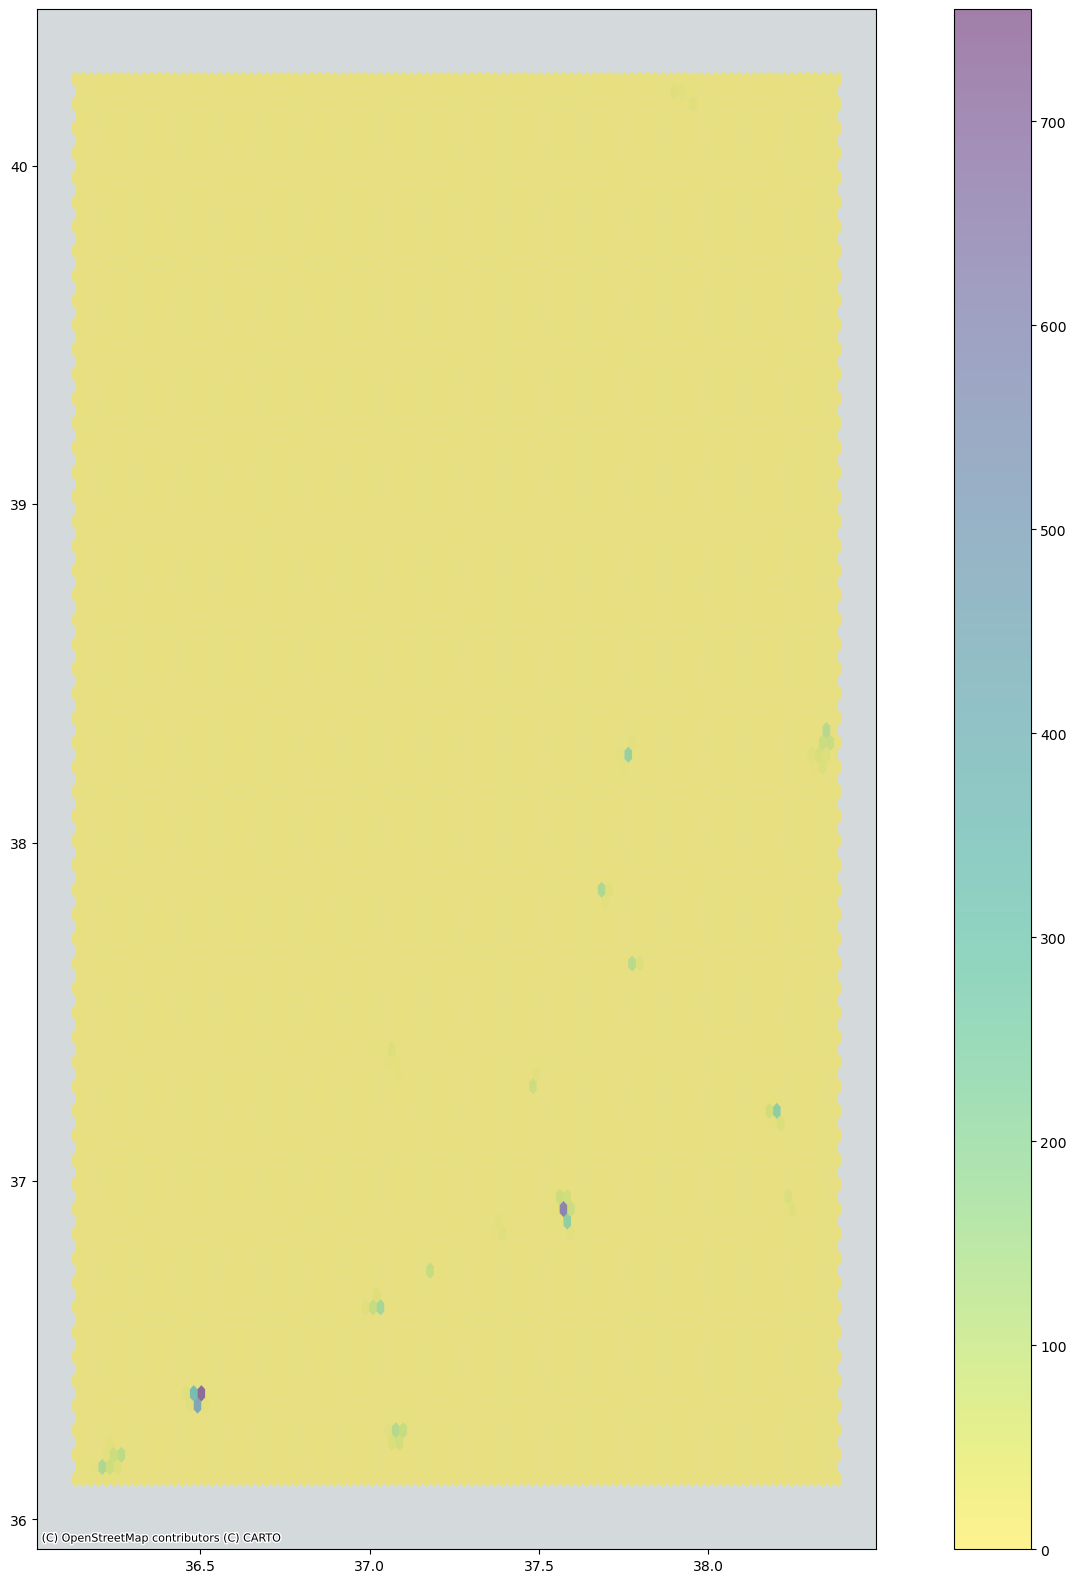

In [8]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Generate and add hexbin with 150 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    filtered_data["latitude"],
    filtered_data["longitude"],
    gridsize=100,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)

/tmp/ipykernel_56319/1847619400.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


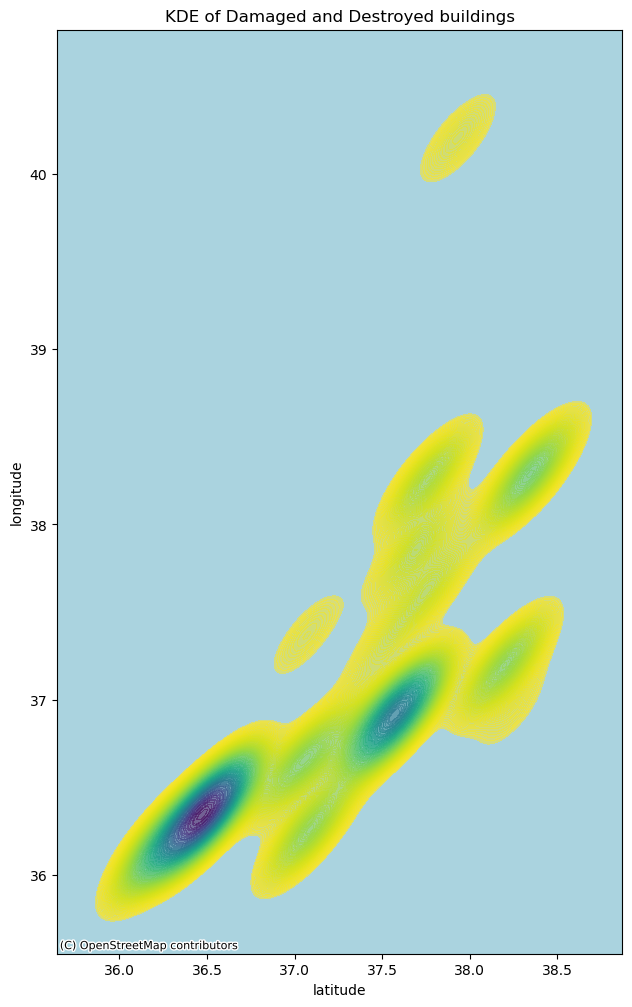

In [9]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 12))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    x="latitude",
    y="longitude",
    data=filtered_data,
    n_levels=150,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
)
# Set title
ax.set_title('KDE of Damaged and Destroyed buildings')


# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.OpenStreetMap.Mapnik
)

    Centrography : 
Centrography is a study focused on analyzing the centrality of a point pattern. It evaluates the overall location and spread of a pattern, similar to how the mean is used in measures of central tendency. This method helps summarize spatial distributions into more concise information sets, like a single point. Centrography uses various indices to determine the location of a point pattern, its clustering intensity around the center, and the irregularity of its shape.


    Tendency:
Tendency is a way to find the middle of point patterns, finding the "heart" of the data. The center of mass is like the average spot of marked data points. If the data points don't have marks, this "heart" or center is just the average location. There's also a "middle" point where half the data is around it, called the median center. We can use centography function of the pointpats library

In [10]:

#calculating the mean center of the data destroyed and damaged data
mean_center_destroyeddamaged = centrography.mean_center(filtered_data[["latitude", "longitude"]])
med_center_destroyeddamaged = centrography.euclidean_median(filtered_data[["latitude", "longitude"]])
#calculating the mean center of all the data 
mean_center_data= centrography.mean_center(data[["latitude", "longitude"]])
med_center_data = centrography.euclidean_median(data[["latitude", "longitude"]])


# Locations of the important earthquakes over magniture 6 on the disaster day.
Pazarcik_point = 37.288, 37.043	
Nurdagi_point = 37.304, 36.920
elbistan_point = 38.089, 37.239


/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


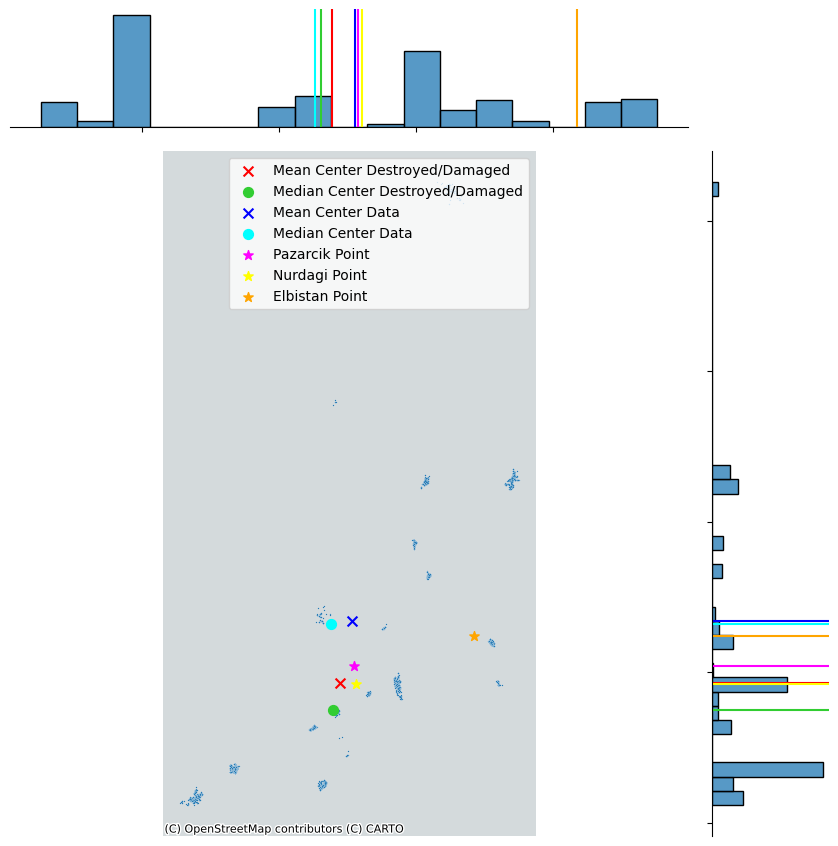

In [11]:


# Generate scatterplot
joint_axes = sns.jointplot(
    x="latitude", y="longitude", data=filtered_data, s=1, height=9
)

# Add points for destroyed and damaged data mean and median centers
for pt, color, marker, label in [
    (mean_center_destroyeddamaged, "red", "x", "Mean Center Destroyed/Damaged"),
    (med_center_destroyeddamaged, "limegreen", "o", "Median Center Destroyed/Damaged"),
    (mean_center_data, "blue", "x", "Mean Center Data"),
    (med_center_data, "cyan", "o", "Median Center Data"),
    (Pazarcik_point, "magenta", "*", "Pazarcik Point"),
    (Nurdagi_point, "yellow", "*", "Nurdagi Point"),
    (elbistan_point, "orange", "*", "Elbistan Point")
]:
    joint_axes.ax_joint.scatter(
        pt[0], pt[1], color=color, marker=marker, s=50, label=label
    )
    joint_axes.ax_marg_x.axvline(pt[0], color=color)
    joint_axes.ax_marg_y.axhline(pt[1], color=color)

# Legend
joint_axes.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    joint_axes.ax_joint, source=ctx.providers.CartoDB.Positron
)

# Clean axes
joint_axes.ax_joint.set_axis_off()

# Display
plt.show()

Although the whole data's mean and median are more in the north, we find out that destroyed or damaged buildings are tend to stay aroud the closer points. Meantime the Elbistan earthquake's point is far from the mean and median observations. This area doesn't relatively have many damaged buildings compared to surrounding of other eaarthquakes.

In [12]:
#calculating standard spatial distance for buildings

centrography.std_distance(filtered_data[["latitude", "longitude"]])

1.0463344620571575

In [13]:
major, minor, rotation = centrography.ellipse(filtered_data[["latitude", "longitude"]])

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


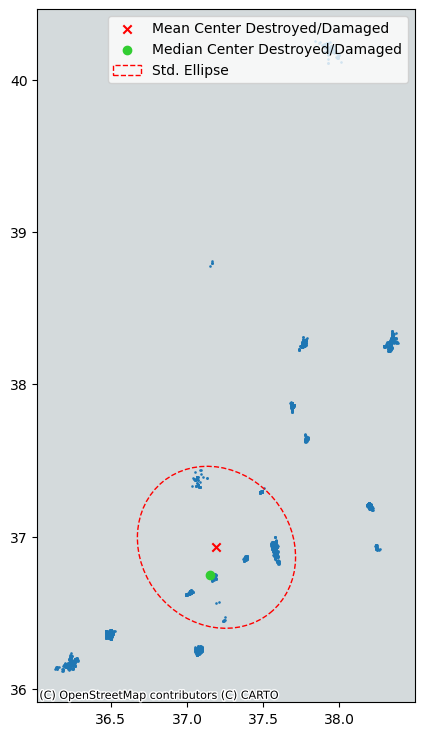

In [14]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(filtered_data["latitude"], filtered_data["longitude"], s=0.75)
ax.scatter(*mean_center_destroyeddamaged, color="red", marker="x", label="Mean Center Destroyed/Damaged")
ax.scatter(
    *med_center_destroyeddamaged, color="limegreen", marker="o", label="Median Center Destroyed/Damaged"
)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(
    xy=mean_center_destroyeddamaged,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=np.rad2deg(
        rotation
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse",
)
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.CartoDB.Positron
)
plt.show()

his means that, on average, damaged/destroyed buildings are on averace 1.04 degree of latitude/longitude away from each other.

    Randomness and Clustering:

Spatial statistics often look at the evenness of point distributions: whether points group closely together or spread out across an area. This deals with the intensity or spread of the point pattern. The aim is to understand the overall clustering in the pattern, and much work has been done on this topic. Two main methods to study clustering are:

1.Quadrat statistics: This method divides data into small areas called quadrants. These areas are then studied to see how evenly points are distributed across them.


2.Techniques based on Ripley (1988): These focus on measuring the distances between points in a pattern.

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


gstat = 0.0


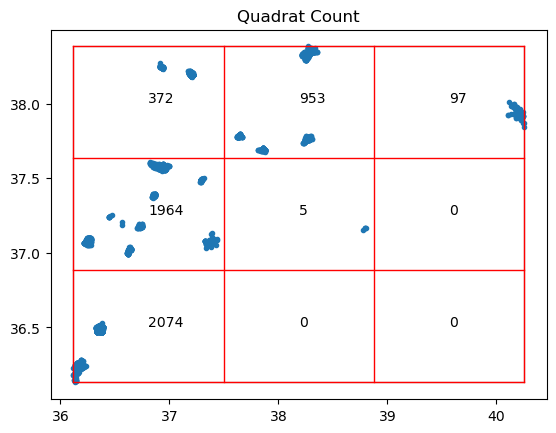

In [15]:

filtered= pd.DataFrame(filtered_data[['longitude', 'latitude']])

pp = PointPattern(filtered.values)

qstat = QStatistic(pp)
print(f'gstat = {qstat.chi2_pvalue}')
qstat.plot()

In [16]:
from shapely.geometry import Polygon
import pandas as pd
from pointpats import random

# Compute bounding box from the data using DataFrame methods
min_x = filtered['longitude'].min()
max_x = filtered['longitude'].max()
min_y = filtered['latitude'].min()
max_y = filtered['latitude'].max()

# Create a Polygon object from the bounding box
bbox_polygon = Polygon([(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)])

# Now generate the Poisson random point pattern using the polygon
random_pattern = random.poisson(bbox_polygon, size=len(filtered))



In [17]:
len(random_pattern)

5465

/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


chisquare_random = 0.38408632434081896


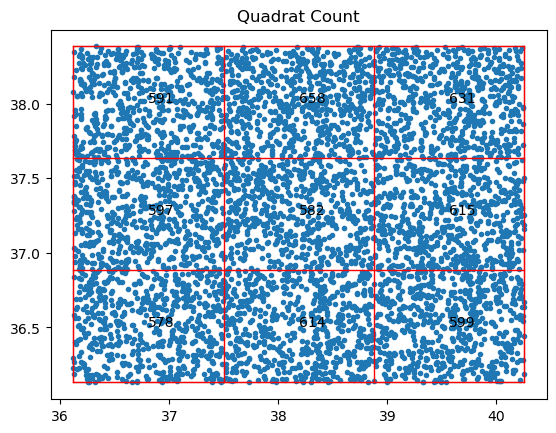

In [18]:
qstat_null = QStatistic(random_pattern)
print(f'chisquare_random = {qstat_null.chi2_pvalue}')
qstat_null.plot()

In [19]:
import libpysal
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(
    filtered[['longitude', 'latitude']].values, return_circles=True
)


/home/lapita/anaconda3/envs/new_geo_env/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [21]:
g_test = distance_statistics.g_test(
    filtered[['longitude', 'latitude']].values, 
    support=40, 
    metric='euclidean',
    keep_simulations=True
)

TypeError: argument of type 'builtin_function_or_method' is not iterable

In [ ]:
g_test

In [ ]:
%matplotlib inline
f, ax = plt.subplots(
    1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3))
)
# plot all the simulations with very fine lines
ax[0].plot(
    g_test.support, g_test.simulations.T, color="k", alpha=0.1
)
# and show the average of simulations
ax[0].plot(
    g_test.support,
    np.median(g_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's G function
ax[0].plot(
    g_test.support, g_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest neighbor\ndistances shorter")
ax[0].legend()
ax[0].set_xlim(0, 0.035)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*filtered.values.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()

In [ ]:
f_test = distance_statistics.f_test(
    filtered.values, support=40, keep_simulations=True
)

In [ ]:
f, ax = plt.subplots(
    1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3))
)

# plot all the simulations with very fine lines
ax[0].plot(
    f_test.support, f_test.simulations.T, color="k", alpha=0.01
)
# and show the average of simulations
ax[0].plot(
    f_test.support,
    np.median(f_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's F function
ax[0].plot(
    f_test.support, f_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest point in pattern\ndistances shorter")
ax[0].legend()
ax[0].set_xlim(0, 0.035)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*filtered.values.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()